# 2.2.1 Definición de probabilidad y sus aplicaciones: Algoritmo 1R

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from data import data

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

Las técnicas de clasificación son utilizadas para resolver problemas en los cuales se debe determinar a cuál clase pertenece una instancia a partir de los valores de sus atributos; entre los casos prácticos de aplicación se encuentran: el diagnóstico de enfermedades (el paciente tiene o no la enfermedad), la detección de fraudes, los sistemas de reconocimiento (el objeto es o no es una persona), el riesgo crediticio (el solicitante pagará o no pagará la deuda). En este tutorial se presenta el algoritmo 1R, el cual permite construir un clasificador de referencia basado en reglas de asociación, y contra el cual se pueden contrastar los resultados de otros algoritmos más complejos.

## Descripción del problema

El problema abordado se desea determina a que clase pertenece una nueva observación (A, B o C), con base en una muestra de observaciones recolectada previamente.

Se tiene un conjunto ficticio de 15 ejemplos para los cuales se tienen tres características x1, x2 y x3 y su respectiva clase. Se desea determinar a qué clase pertenece un nuevo punto con coordenadas x1, x2 y x3. Si las clases representan la presencia (o no) de una enfermedad, las variables xi podrían representan, por ejemplo, los resultados de los exámenes médicos de los pacientes.

In [3]:
data

,x1,x2,x3,y
0,a,e,h,A
1,a,e,i,C
2,a,e,j,B
3,a,f,h,A
4,a,f,i,A
5,a,g,h,A
6,a,g,h,B
7,b,e,i,B
8,b,f,i,B
9,b,f,j,B


## Definición de probabilidad como frecuencia

- Espacio muestral: se define como el conjunto de todos los posibles resultados de un experimento.

- Pregunta. En la tirada de dos dados, ¿cuál es el espacio muestral?

- Evento: Es cualquier colección de posibles resultados de un experimento (subconjunto del espacio muestral).

En su forma más simple, el concepto de probabilidad puede interpretarse como la frecuencia con que ocurre un evento. Por ejemplo, si en la tirada de dos dados se definen como un evento la cantidad de posibles resultados que dan una suma determinada, entonces:

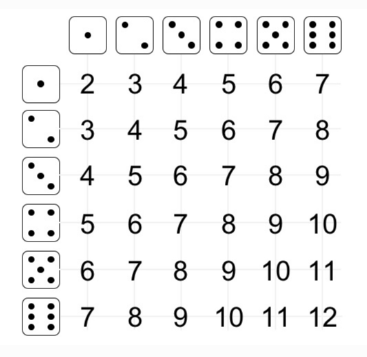

Pr(𝑋= 2) = 1 / 36   
Pr(𝑋= 3) = 2 / 36   
Pr(𝑋= 4) = 3 / 36   
Pr(𝑋= 5) = 4 / 36   
Pr(𝑋= 6) = 5 / 36   
Pr(𝑋= 7) = 6 / 36   
Pr(𝑋= 8) = 5 / 36   
Pr(𝑋= 9) = 4 / 36
Pr(𝑋=10) = 3 / 36
Pr(𝑋=11) = 2 / 36
Pr(𝑋=12) = 1 / 36

## Propiedades y definiciones básicas sobre probabilidad

- Todas las probabilidades deben estar entre 0 y 1:

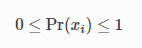

- Las probabilidades de eventos mutuamente exclusivos (no pueden ocurrir simultáneamente) y colectivamente exhaustivos (cubren todo el universo de casos posibles) deben sumar la unidad:

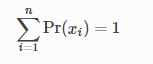

- Probabilidad condicional Pr(A|B): probabilidad de que ocurra un evento A sabiendo que otro evento B ya ocurrió.

- Independencia: Si los eventos A y B son independientes:

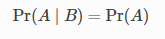

## Reglas de asociación para clasificación

La metodología 1R se basa en la partición del espacio de entrada usando una y sólo una de las variables (atributos) del problema. Para el problema planteado, una regla basada en el atributo x1 podría ser:

if x1 in {a, d}:  y = A
if x1 in {b}:     y = B
if x1 in {c}:     y = C

El algoritmo funciona de la siguiente forma: se toma el primer atributo x1 y se divide en grupos por cada valor que puede tomar dicho atributo, es decir, por a, b, c, y d; para cada atributo se determina a que clase es más probable que pertenezca los ejemplos y se asigna dicha clase a dicho atributo. Es decir, para cada atributo se cuentan cuántos ejemplos hay de cada categoría y se asigna la clase por mayoría, esto es, si hay cuatro ejemplos para la categoría a de x1 y tres de ellos pertenecen a la clase A y el restante a C se dice que if x1 == a: y = A; esto equivale a decir que si x1 == a es más probable que el ejemplo pertenezca a la clase sea A. Así, el clasificador basado en este atributo podría ser escrito como un sistema de reglas:

     #   x1   x2   x3    y
--------------------------

if x1 == a:  y = A

     1    a    g    h    A
     2    a    e    i    A
     3    a    f    h    A
    11    a    e    i    C

if x1 == b:  y = B

     6    b    e    i    B
     7    b    f    i    B
    12    b    g    j    C
     8    b    f    i    B

if x1 == c:  y = C

     9    c    g    h    B
    10    c    g    h    B
    13    c    f    j    C
    14    c    g    h    C
    15    c    e    i    C

if x1 == d:  y = A

     4    d    f    j    A
     5    d    g    j    A

Al agrupar por x1, este conjunto de reglas se reescribe como:

if x1 in {a, d}:
    y = A
elif x1 in {b}:
    y = B
else:
    y = C

Para el clasificador anterior se puede calcular una métrica de error.

Luego se toma el segundo atributo x2 y se procede de igual forma para construir otro clasificador. El proceso se repite hasta obtener un clasificador por cada atributo. Se escoge el clasificador con mayor precisión.

## Métricas de desempeño de clasificadores

In [ ]:
print('ok_')

ok_
